#Global Climate Trends

##Analysis


In [1]:
# Dependencies and Setup
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
# Study co2 data file
co2_path = "Data/Sorted/co2_emissions.csv"

# Path to input files
co2_input_file_path = os.path.join(co2_path)

# Path to output files
co2_output_file_path = os.path.join( "Data/output/Energy_CO2_Emissions_by_year_n_country.csv")

# Read the energyata and the study results
co2_df = pd.read_csv(co2_input_file_path)
co2_df


,Country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Canada,403.5,393.4,406.7,437.4,457.4,444.8,428.0,441.9,438.4,...,559.3,564.5,564.3,545.9,561.5,571.5,558.8,500.1,510.2,519.7
1,Mexico,233.9,230.4,239.9,241.0,253.9,280.8,287.3,290.9,293.6,...,496.7,482.8,480.9,491.1,503.3,489.0,480.1,417.8,449.8,505.9
2,US,4576.0,4598.2,4749.9,4969.1,5058.1,4970.5,4922.6,5004.9,5117.6,...,5246.6,5251.7,5137.5,5038.0,4978.8,5133.2,4981.6,4462.7,4768.4,4825.8
3,Argentina,94.6,100.0,104.6,109.9,107.2,100.3,102.8,108.9,107.7,...,187.6,187.8,191.2,190.1,188.5,186.0,174.6,162.3,184.7,190.1
4,Brazil,185.0,199.4,205.8,207.6,211.4,206.4,213.4,212.4,222.5,...,487.0,511.7,494.8,455.9,461.7,442.1,435.5,408.4,461.6,443.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Sri Lanka,4.9,5.0,5.6,5.2,4.8,5.4,5.4,6.1,6.1,...,15.9,19.6,21.6,24.9,24.5,23.5,25.2,24.7,23.0,19.9
87,Taiwan,73.7,85.5,90.6,106.8,116.8,120.1,128.4,138.3,149.7,...,268.5,275.4,275.7,280.9,286.9,284.8,279.3,265.7,280.2,272.4
88,Thailand,46.1,47.8,56.4,63.8,74.0,89.4,99.1,108.7,122.5,...,265.8,273.7,281.1,286.8,287.5,293.2,288.4,273.1,270.3,275.3
89,Vietnam,17.4,19.0,21.5,21.0,17.9,18.0,17.5,18.4,20.7,...,134.0,150.2,181.9,197.3,199.0,240.4,291.1,285.0,273.1,270.0


In [3]:
# Path to per capita file
per_capita_file_path = "Data/Sorted/energy_consumption_per_capita.csv"

# Path to input files
per_capita_input_file_path = os.path.join(per_capita_file_path)

# Path to output files
per_capita_output_file_path = os.path.join("Data/output/primary_energy_consumption_capita_by_year_n_country.csv")

# Read the energyata and the study results
capita_df = pd.read_csv(per_capita_input_file_path)
capita_df

,Country,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Canada,398.0,397.7,405.5,415.8,413.2,391.6,388.2,393.9,399.3,...,410.6,407.5,406.4,396.7,397.8,396.2,388.7,361.8,362.7,367.8
1,Mexico,54.5,52.0,52.8,52.3,54.3,58.1,58.6,58.6,57.6,...,68.8,67.5,66.0,66.7,67.3,65.8,64.5,59.0,63.1,68.4
2,US,309.0,308.8,316.0,327.1,331.4,328.0,323.1,323.2,325.4,...,290.0,290.6,285.5,283.0,281.8,290.1,286.2,263.7,277.2,283.5
3,Argentina,57.2,59.6,61.3,61.4,58.4,56.6,56.7,60.0,61.1,...,83.3,82.4,83.0,81.8,81.0,79.8,74.6,69.5,76.8,79.2
4,Brazil,36.1,37.3,37.6,38.0,38.3,37.4,38.0,37.9,39.0,...,62.0,63.1,61.7,59.7,59.8,59.5,60.1,57.3,60.0,62.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,Sri Lanka,5.7,6.0,6.1,5.9,5.7,6.3,6.2,6.5,7.0,...,13.5,14.4,16.1,17.6,17.0,17.6,17.9,17.5,17.6,15.7
87,Taiwan,73.3,78.8,84.3,92.1,96.8,102.2,107.1,112.8,118.4,...,203.0,206.7,205.7,206.4,205.5,207.7,203.6,197.5,208.8,200.2
88,Thailand,13.5,14.1,15.9,17.5,20.0,23.1,25.1,27.0,30.2,...,67.7,69.5,70.8,71.9,73.0,75.0,74.9,69.5,69.9,70.6
89,Vietnam,3.7,3.9,4.3,4.2,3.9,4.1,4.1,4.4,5.0,...,26.3,28.7,32.4,34.8,37.1,41.2,45.3,44.9,44.6,46.7


In [4]:
# Create co2 Array to further sort data for merging
co2_df_array = []

# Loop over the columns of the dataframe skipping the first column
for column in co2_df.columns[1:]:
    # Create a new dataframe with the country and the year
    cy_list = co2_df[['Country', column]].copy()

    # Adding a new column to the dataframe and positionong
    cy_list.insert(0, 'Year', column)

    #Rename for dataset
    cy_list.rename(columns={column: "Energy CO2 Emissions" }, inplace=True)

    # Adding the new dataframe to the array
    co2_df_array.append(cy_list)

co2_df_array

[    Year             Country Energy CO2 Emissions
 0   1985              Canada                403.5
 1   1985              Mexico                233.9
 2   1985                  US               4576.0
 3   1985           Argentina                 94.6
 4   1985              Brazil                185.0
 ..   ...                 ...                  ...
 86  1985           Sri Lanka                  4.9
 87  1985              Taiwan                 73.7
 88  1985            Thailand                 46.1
 89  1985             Vietnam                 17.4
 90  1985  Other Asia Pacific                166.7
 
 [91 rows x 3 columns],
     Year             Country Energy CO2 Emissions
 0   1986              Canada                393.4
 1   1986              Mexico                230.4
 2   1986                  US               4598.2
 3   1986           Argentina                100.0
 4   1986              Brazil                199.4
 ..   ...                 ...                  ...
 86  

In [5]:
# Merge dfs 
merged_co2_df = pd.concat(co2_df_array, ignore_index=True)
merged_co2_df

#Save csv
merged_co2_df.to_csv(co2_output_file_path, index=False, header=True)

,Year,Country,Energy CO2 Emissions
0,1985,Canada,403.5
1,1985,Mexico,233.9
2,1985,US,4576.0
3,1985,Argentina,94.6
4,1985,Brazil,185.0
...,...,...,...
3453,2022,Sri Lanka,19.9
3454,2022,Taiwan,272.4
3455,2022,Thailand,275.3
3456,2022,Vietnam,270.0


In [6]:
capita_df_array = []

# Loop over the columns of the dataframe skipping the first column
for column in capita_df.columns[1:]:
    # Create a new dataframe with the country and the year
    cy_list = capita_df[['Country', column]].copy()

    # Adding a new column to the dataframe and positionong
    cy_list.insert(0, 'Year', column)

    #Rename for dataset
    cy_list.rename(columns={column: 'Primary Energy Consumption per Capita'}, inplace=True)

    # Adding the new dataframe to the array
    capita_df_array.append(cy_list)

capita_df_array

[    Year             Country  Primary Energy Consumption per Capita
 0   1985              Canada                                  398.0
 1   1985              Mexico                                   54.5
 2   1985                  US                                  309.0
 3   1985           Argentina                                   57.2
 4   1985              Brazil                                   36.1
 ..   ...                 ...                                    ...
 86  1985           Sri Lanka                                    5.7
 87  1985              Taiwan                                   73.3
 88  1985            Thailand                                   13.5
 89  1985             Vietnam                                    3.7
 90  1985  Other Asia Pacific                                   19.9
 
 [91 rows x 3 columns],
     Year             Country  Primary Energy Consumption per Capita
 0   1986              Canada                                  397.7
 1   198

In [7]:
# Merge dfs 
merged_capita_df = pd.concat(capita_df_array, ignore_index=True)
merged_capita_df

#Save csv
merged_capita_df.to_csv(per_capita_output_file_path, index=False, header=True)

In [8]:
# Path to folders for merging of all 3 cleaned datasets
input_folder_path = os.path.join(".", "Data", "Input")
output_folder_path = os.path.join(".", "Data", "output")

# Path to ALL cleaned input files for merging
total_consumption_input_file_path = os.path.join(input_folder_path, "primary_energy_consumption.csv")
per_capita_input_file_path = os.path.join(input_folder_path, "energy_consumption_capita.csv")
co2_input_file_path = os.path.join(input_folder_path, "co2_emissions_country.csv")

In [9]:
# Read input files
df_consumption = pd.read_csv(total_consumption_input_file_path)
df_per_capita = pd.read_csv(per_capita_input_file_path)
df_co2 = pd.read_csv(co2_input_file_path)

In [11]:
# Merge first two dataframes
merged_df = pd.merge(df_consumption, df_per_capita, on= ['Year','Country'], how='inner')

# Merge third dataframe with new merged_df, print out for complete df
energy_consumption_df = pd.merge(merged_df, df_co2, on= ['Year','Country'], how='inner')
energy_consumption_df

,Year,Country,Primary Energy Consumption,Primary Energy Consumption per Capita,Energy CO2 Emissions
0,1985,Canada,10.29,398.0,403.5
1,1985,Mexico,4.08,54.5,233.9
2,1985,US,72.66,309.0,4576.0
3,1985,Argentina,1.73,57.2,94.6
4,1985,Brazil,4.94,36.1,185.0
...,...,...,...,...,...
3453,2022,Sri Lanka,0.34,15.7,19.9
3454,2022,Taiwan,4.78,200.2,272.4
3455,2022,Thailand,5.06,70.6,275.3
3456,2022,Vietnam,4.59,46.7,270.0


In [12]:
# Analyze and compare CO2 emissions and energy consumption per capita

# Convert to numerical values to avoid error
energy_consumption_df['Energy CO2 Emissions'] = pd.to_numeric(energy_consumption_df['Energy CO2 Emissions'], errors='coerce')
energy_consumption_df['Primary Energy Consumption'] = pd.to_numeric(energy_consumption_df['Primary Energy Consumption'], errors='coerce')

# Define columns for comparison
co2_emissions = energy_consumption_df['Energy CO2 Emissions']
energy_consumption = energy_consumption_df['Primary Energy Consumption']

# Solve for correlation of CO2 emission and average energy consumption, print out result
consumption_emissions_corr = co2_emissions.corr(energy_consumption)
print(f"Correlation between CO2 emissions and energy consumption: {consumption_emissions_corr}")

Correlation between CO2 emissions and energy consumption: 0.9886315204301782


In [13]:
from scipy.stats import linregress

Correlation between CO2 emissions and energy consumption: 0.9886315204301782


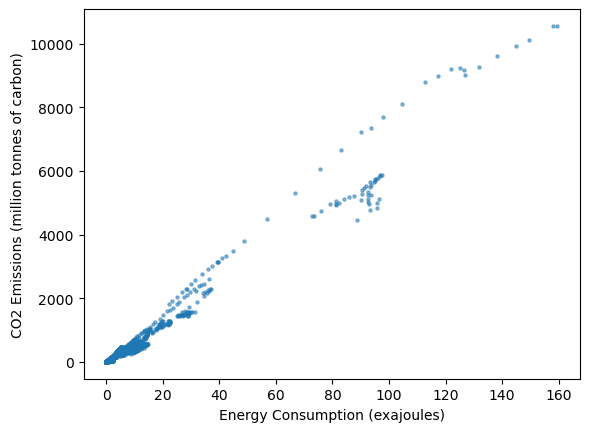

In [14]:
# Create graph to visualize correlation between energy consumption and CO2 emission
consumption_emissions_corr = co2_emissions.corr(energy_consumption)

slope, intercept, rvalue, pvalue, stderr = linregress(energy_consumption, co2_emissions)

plt.scatter(energy_consumption, co2_emissions, s=5, alpha=0.5)
plt.plot(energy_consumption, slope * energy_consumption + intercept, color = 'red')

plt.xlabel('Energy Consumption (exajoules)')
plt.ylabel('CO2 Emissions (million tonnes of carbon)')


print(f"Correlation between CO2 emissions and energy consumption: {consumption_emissions_corr}")
plt.show()

In [15]:
# Analyze and compare CO2 emissions and energy consumption per capita

energy_consumption_df['Energy CO2 Emissions'] = pd.to_numeric(energy_consumption_df['Energy CO2 Emissions'], errors='coerce')
energy_consumption_df['Primary Energy Consumption per Capita'] = pd.to_numeric(energy_consumption_df['Primary Energy Consumption per Capita'], errors='coerce')

co2_emissions = energy_consumption_df['Energy CO2 Emissions']
energy_consumption_per_capita = energy_consumption_df['Primary Energy Consumption per Capita']
capita_emissions_corr = co2_emissions.corr(energy_consumption_per_capita)
print(f"Correlation between CO2 emissions and energy consumption per capita: {capita_emissions_corr}")

Correlation between CO2 emissions and energy consumption per capita: 0.06282253766807099


Correlation between CO2 emissions and energy consumption: 0.06282253766807099


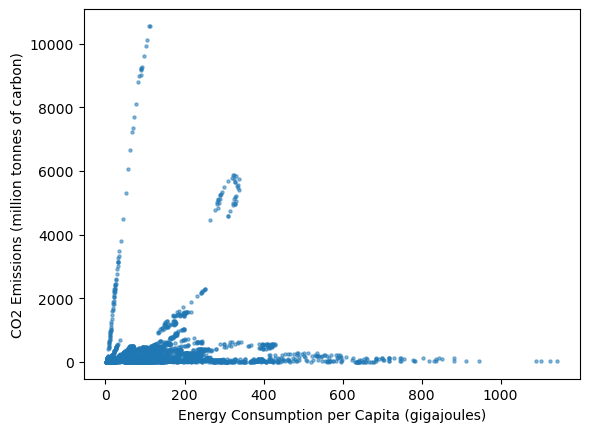

In [16]:
# Create graph to visualize correlation between CO2 emissions and energy consumption per capita
capita_emissions_corr = co2_emissions.corr(energy_consumption_per_capita)

slope, intercept, rvalue, pvalue, stderr = linregress(energy_consumption_per_capita, co2_emissions)

plt.scatter(energy_consumption_per_capita, co2_emissions, s=5, alpha=0.5)
plt.plot(energy_consumption_per_capita, slope * energy_consumption_per_capita + intercept, color = 'red')

plt.xlabel('Energy Consumption per Capita (gigajoules)')
plt.ylabel('CO2 Emissions (million tonnes of carbon)')


print(f"Correlation between CO2 emissions and energy consumption: {capita_emissions_corr}")
plt.show()

In [18]:
# Solve for yearly percent change of energy use for each country/year

# Make a df copy for percent change to avoid rewriting, sort by 'Country' and 'Year' 
percent_energy_consumption_df = energy_consumption_df.copy()
percent_energy_consumption_df = percent_energy_consumption_df.sort_values(by=['Country', 'Year'])

# Calculate percentage change of energy consumption per capita by year for each country
percent_energy_consumption_df['Percentage Change'] = (percent_energy_consumption_df.groupby('Country')['Primary Energy Consumption per Capita']
                                                   .pct_change() * 100)

# Drop null values/ NaN from data table
percent_energy_consumption_df = percent_energy_consumption_df.dropna(subset=['Percentage Change'])

# Create new variable to store results
percentage_change_capita_consum = percent_energy_consumption_df[['Country', 'Year', 'Percentage Change']]

# Print table with percentage change for each 'Year' by 'Country'
print(percentage_change_capita_consum)

             Country  Year  Percentage Change
155          Algeria  1986           2.341920
246          Algeria  1987          -0.457666
337          Algeria  1988           4.367816
428          Algeria  1989          -5.286344
519          Algeria  1990           3.255814
...              ...   ...                ...
3073  Western Africa  2018           7.936508
3164  Western Africa  2019           2.941176
3255  Western Africa  2020          -2.857143
3346  Western Africa  2021           4.411765
3437  Western Africa  2022           0.000000

[3355 rows x 3 columns]


In [41]:
# Find the year with the largest percentage change for each country
largest_change_by_country = percent_energy_consumption_df.groupby('Country').apply(lambda x: x.loc[x['Percentage Change'].idxmax()])

# Display the result in a table
print("Year with the Largest Percentage Change in Per Capita Energy Spending by Country:")
largest_change_by_country[['Country', 'Year', 'Percentage Change']]

Year with the Largest Percentage Change in Per Capita Energy Spending by Country:


,Country,Year,Percentage Change
Country,,,
Algeria,Algeria,2012,6.986900
Argentina,Argentina,2021,10.503597
Australia,Australia,1989,3.334921
Austria,Austria,1987,5.514950
Azerbaijan,Azerbaijan,2011,12.127237
...,...,...,...
United Kingdom,United Kingdom,1996,4.608586
Uzbekistan,Uzbekistan,1999,11.703511
Venezuela,Venezuela,2021,16.771160


In [19]:
# Largest yearly energy spenders
# Group by 'year' and find the country with the highest energy consumption for each year
highest_energy_spenders = energy_consumption_df.loc[energy_consumption_df.groupby('Year')['Primary Energy Consumption'].idxmax()]

# Create a new DataFrame with 'year' and corresponding highest energy spender by 'country'
highest_spenders_per_year = highest_energy_spenders[['Year', 'Country', 'Primary Energy Consumption']]

# Display the highest energy spender for each year
highest_energy_spenders_df= pd.DataFrame(highest_spenders_per_year)
highest_energy_spenders_df.name = 'Largest Energy Spenders Yearly by Energy Consumption'
highest_energy_spenders_df

,Year,Country,Primary Energy Consumption
2,1985,US,72.66
93,1986,US,73.34
184,1987,US,75.80
275,1988,US,79.25
366,1989,US,81.17
457,1990,US,81.38
548,1991,US,81.27
639,1992,US,82.47
730,1993,US,84.20
821,1994,US,85.75


In [20]:
# Find the top 10 countries with the highest energy consumption for given year (1985)
energy_1985 = energy_consumption_df[energy_consumption_df['Year'] == 1985]
top_energy_spenders_1985 = energy_1985.nlargest(10, 'Primary Energy Consumption')

# Create new Dataframe for the top 10 energy spenders in 1985
top_10_energy_spenders_1985_df = top_energy_spenders_1985[['Year', 'Country', 'Primary Energy Consumption']]

# Display and rename DataFrame
top_10_energy_spenders_1985_df.name = 'Top 10 Energy Spenders in 1985 by Energy Consumption'
top_10_energy_spenders_1985_df

,Year,Country,Primary Energy Consumption
2,1985,US,72.66
51,1985,Russian Federation,34.40
75,1985,China,22.14
79,1985,Japan,16.13
24,1985,Germany,15.45
0,1985,Canada,10.29
45,1985,Ukraine,10.01
23,1985,France,8.66
46,1985,United Kingdom,8.61
29,1985,Italy,5.89


In [21]:
# Find the top 10 countries with the highest energy consumption for given year (1995)
energy_1995 = energy_consumption_df[energy_consumption_df['Year'] == 1995]
top_energy_spenders_1995 = energy_1995.nlargest(10, 'Primary Energy Consumption')

# Create new Dataframe for the top 10 energy spenders in 1995
top_10_energy_spenders_1995_df = top_energy_spenders_1995[['Year', 'Country', 'Primary Energy Consumption']]

# Display and rename DataFrame
top_10_energy_spenders_1995_df.name = 'Top 10 Energy Spenders in 1995 by Energy Consumption'
top_10_energy_spenders_1995_df

,Year,Country,Primary Energy Consumption
912,1995,US,87.63
985,1995,China,37.27
961,1995,Russian Federation,27.73
989,1995,Japan,21.49
934,1995,Germany,14.31
910,1995,Canada,12.17
987,1995,India,10.67
933,1995,France,10.37
956,1995,United Kingdom,9.19
939,1995,Italy,6.97


In [22]:
# Find the top 10 countries with the highest energy consumption for given year (2000)
energy_2000 = energy_consumption_df[energy_consumption_df['Year'] == 2000]
top_energy_spenders_2000 = energy_2000.nlargest(10, 'Primary Energy Consumption')

# Create new Dataframe for the top 10 energy spenders in 2000
top_10_energy_spenders_2000_df = top_energy_spenders_2000[['Year', 'Country', 'Primary Energy Consumption']]

# Display and rename DataFrame
top_10_energy_spenders_2000_df.name = 'Top 10 Energy Spenders in 2000 by Energy Consumption'
top_10_energy_spenders_2000_df

,Year,Country,Primary Energy Consumption
1367,2000,US,95.56
1440,2000,China,42.48
1416,2000,Russian Federation,25.97
1444,2000,Japan,22.47
1389,2000,Germany,14.36
1442,2000,India,13.42
1365,2000,Canada,13.13
1388,2000,France,11.19
1411,2000,United Kingdom,9.59
1369,2000,Brazil,8.48


In [23]:
# Find the top 10 countries with the highest energy consumption for given year (2010)
energy_2010 = energy_consumption_df[energy_consumption_df['Year'] == 2010]
top_energy_spenders_2010 = energy_2010.nlargest(10, 'Primary Energy Consumption')

# Create new Dataframe for the top 10 energy spenders in 2010
top_10_energy_spenders_2010_df = top_energy_spenders_2010[['Year', 'Country', 'Primary Energy Consumption']]

# Display and rename DataFrame
top_10_energy_spenders_2010_df.name = 'Top 10 Energy Spenders in 2010 by Energy Consumption'
top_10_energy_spenders_2010_df

,Year,Country,Primary Energy Consumption
2350,2010,China,104.60
2277,2010,US,93.43
2326,2010,Russian Federation,28.13
2352,2010,India,22.48
2354,2010,Japan,21.27
2299,2010,Germany,13.85
2275,2010,Canada,13.51
2279,2010,Brazil,11.47
2360,2010,South Korea,10.93
2298,2010,France,10.79


In [24]:
# Find the top 10 countries with the highest energy consumption for given year (2020)
energy_2020 = energy_consumption_df[energy_consumption_df['Year'] == 2020]
top_energy_spenders_2020 = energy_2020.nlargest(10, 'Primary Energy Consumption')

# Create new Dataframe for the top 10 energy spenders in 2020
top_10_energy_spenders_2020_df = top_energy_spenders_2020[['Year', 'Country', 'Primary Energy Consumption']]

# Display and rename DataFrame
top_10_energy_spenders_2020_df.name = 'Top 10 Energy Spenders in 2020 by Energy Consumption'
top_10_energy_spenders_2020_df

,Year,Country,Primary Energy Consumption
3260,2020,China,149.45
3187,2020,US,88.57
3262,2020,India,31.76
3236,2020,Russian Federation,29.07
3264,2020,Japan,17.15
3185,2020,Canada,13.71
3209,2020,Germany,12.41
3189,2020,Brazil,12.22
3240,2020,Iran,12.16
3270,2020,South Korea,12.00


In [25]:
# Calculate total energy consumption for each country across all years
total_energy_consumption = energy_consumption_df.groupby('Country')['Primary Energy Consumption'].sum()

# Find the top 10 countries with highest cumulative energy consumption
top_10_cumulative_energy_spenders = total_energy_consumption.nlargest(10)

# Create new DataFrame for top 10 energy spenders for all records (1985-2022)
top_10_cumulative_energy_spenders_df = pd.DataFrame(top_10_cumulative_energy_spenders).reset_index()
top_10_cumulative_energy_spenders_df.columns = ['Country', 'Total Energy Consumption']

# Display and rename DataFrame
top_10_cumulative_energy_spenders_df.name = 'Top 10 Cumulative Energy Spenders 1985-2022'
top_10_cumulative_energy_spenders_df

,Country,Total Energy Consumption
0,US,3413.81
1,China,2899.67
2,Russian Federation,1130.55
3,Japan,760.50
4,India,685.50
5,Germany,538.96
6,Canada,492.05
7,France,389.11
8,Brazil,349.76
9,United Kingdom,336.72


In [26]:
# Largest yearly polluters (by CO2 emissions)
largest_polluters = energy_consumption_df.loc[energy_consumption_df.groupby('Year')['Energy CO2 Emissions'].idxmax()]

# Create a new DataFrame for largest polluters by year and country
largest_polluters_per_year = largest_polluters[['Year', 'Country', 'Energy CO2 Emissions']]

# Display the largest polluter (CO2 emissions) for each year
largest_polluters_df= pd.DataFrame(largest_polluters_per_year)
largest_polluters_df.name = 'Largest Polluters Yearly by CO2 Emissions'
largest_polluters_df

,Year,Country,Energy CO2 Emissions
2,1985,US,4576.0
93,1986,US,4598.2
184,1987,US,4749.9
275,1988,US,4969.1
366,1989,US,5058.1
457,1990,US,4970.5
548,1991,US,4922.6
639,1992,US,5004.9
730,1993,US,5117.6
821,1994,US,5195.4


In [27]:
# Find the top 10 largest polluters for given year (1990)
emissions_1990 = energy_consumption_df[energy_consumption_df['Year'] == 1990]
top_10_polluters_1990 = emissions_1990.nlargest(10, 'Energy CO2 Emissions')

# Create new Dataframe for top 10  polluters in 1990
top_10_polluters_1990_df = top_10_polluters_1990[['Year', 'Country', 'Energy CO2 Emissions']]

# Display and rename DataFrame
top_10_polluters_1990_df.name = 'Top 10 Energy Spenders in 2020 by Energy Consumption'
top_10_polluters_1990_df

,Year,Country,Energy CO2 Emissions
457,1990,US,4970.5
530,1990,China,2308.8
506,1990,Russian Federation,2233.9
534,1990,Japan,1084.1
479,1990,Germany,1007.6
500,1990,Ukraine,761.9
532,1990,India,602.1
501,1990,United Kingdom,595.2
455,1990,Canada,444.8
484,1990,Italy,403.8


In [28]:
# Find the top 10 largest polluters for given year (2010)
emissions_2010 = energy_consumption_df[energy_consumption_df['Year'] == 2010]
top_10_polluters_2010 = emissions_2010.nlargest(10, 'Energy CO2 Emissions')

# Create new Dataframe for top 10  polluters in 1990
top_10_polluters_2010_df = top_10_polluters_2010[['Year', 'Country', 'Energy CO2 Emissions']]

# Display and rename DataFrame
top_10_polluters_2010_df.name = 'Top 10 Energy Spenders in 2010 by Energy Consumption'
top_10_polluters_2010_df

,Year,Country,Energy CO2 Emissions
2350,2010,China,8121.7
2277,2010,US,5485.7
2352,2010,India,1640.0
2326,2010,Russian Federation,1492.4
2354,2010,Japan,1195.9
2299,2010,Germany,783.2
2360,2010,South Korea,586.9
2275,2010,Canada,545.6
2321,2010,United Kingdom,527.8
2330,2010,Iran,504.4


In [29]:
# Calculate the total CO2 emissions for each country across all years
total_emissions = energy_consumption_df.groupby('Country')['Energy CO2 Emissions'].sum()

# Find the top 10 countries with greatest CO2 emissions 
top_polluters = total_emissions.nlargest(10)

# Create a new DataFrame for the top 10 largest CO2 polluters
top_polluters_df = pd.DataFrame(top_polluters).reset_index()
top_polluters_df.columns = ['Country', 'Energy CO2 Emissions']

# Display and rename DataFrame
top_polluters_df.name = 'Top Polluters 1985-2022'
top_polluters_df

,Country,Energy CO2 Emissions
0,China,217008.2
1,US,199297.2
2,Russian Federation,63704.1
3,India,49729.3
4,Japan,44103.7
5,Germany,32067.4
6,United Kingdom,19853.3
7,Canada,19368.2
8,South Korea,17302.1
9,South Africa,15150.3


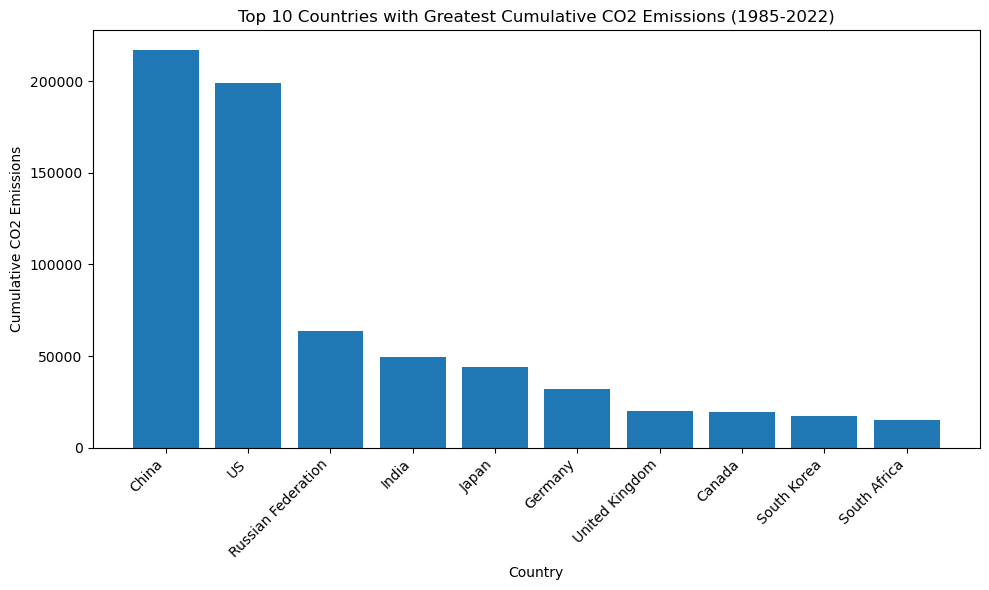

In [39]:

# Plotting the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

plt.bar(top_polluters_df['Country'], top_polluters_df['Energy CO2 Emissions'])

plt.xlabel('Country')
plt.ylabel('Cumulative CO2 Emissions')
plt.title('Top 10 Countries with Greatest Cumulative CO2 Emissions (1985-2022)')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()

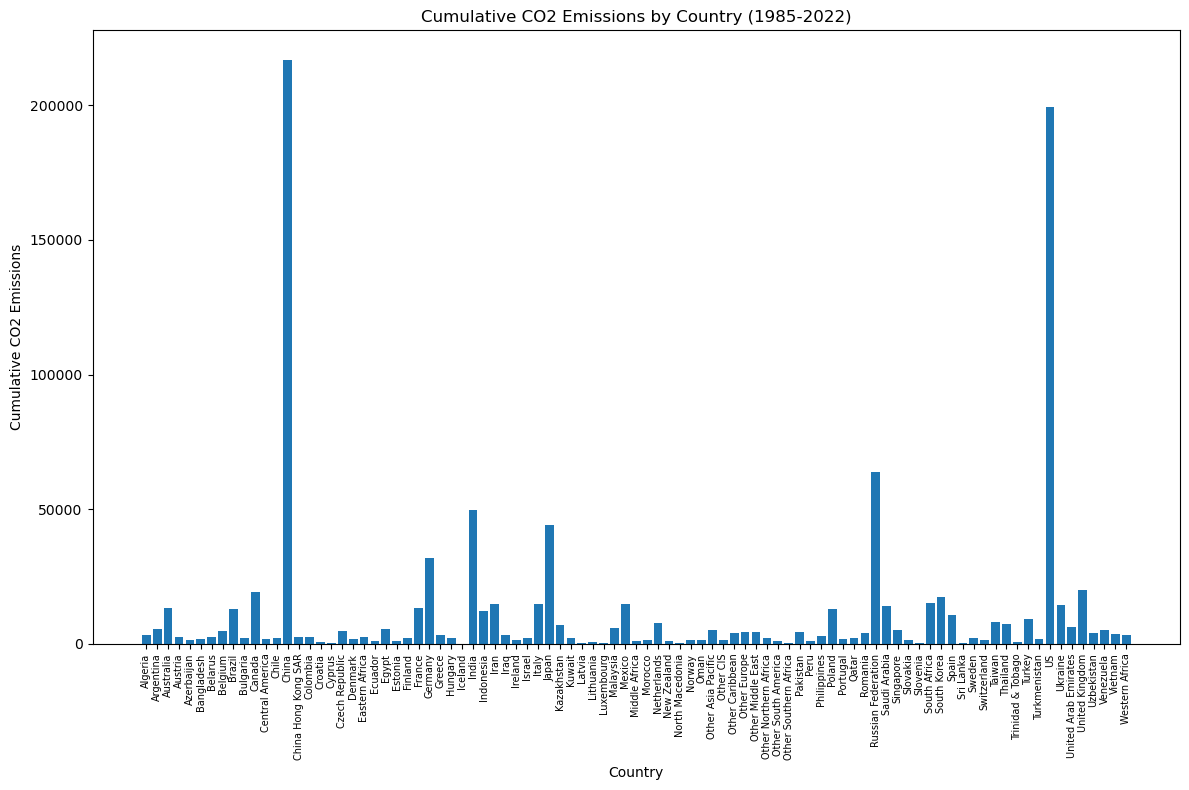

In [38]:
plt.figure(figsize=(12, 8))

plt.bar(total_emissions.index, total_emissions.values)

plt.xlabel('Country')
plt.ylabel('Cumulative CO2 Emissions')
plt.title('Cumulative CO2 Emissions by Country (1985-2022)')

plt.xticks(rotation=90, fontsize=7)

plt.tight_layout()

plt.show()